In [ ]:
Color	Approximate HSV Range (Hue, Sat, Value)
Red	Lower1: [0, 70, 50], Upper1: [10, 255, 255]
Lower2: [170, 70, 50], Upper2: [180, 255, 255]
Green	Lower: [40, 70, 50], Upper: [80, 255, 255]
Blue	Lower: [100, 150, 0], Upper: [140, 255, 255]
Yellow	Lower: [20, 100, 100], Upper: [30, 255, 255]
Orange	Lower: [10, 100, 20], Upper: [25, 255, 255]

In [ ]:
def laplacian(img):
    lap_filter = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    padded_img = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    new_img = np.zeros_like(img, np.float64)

    for i in range(1, img.shape[0]-2):
      for j in range(1, img.shape[1]-2):
        window = padded_img[i-1:i+2, j-1:j+2]
        new_img[i-1, j-1] = np.sum(window * lap_filter)
    return new_img
lap_img = laplacian(img)
new_img = np.add(lap_img, img)
new_img = np.clip(new_img, 0, 255)
new_img = new_img.astype(np.uint8)
plt.imshow(new_img, cmap='gray')

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def laplacian_enhancement(img):
    lap_filter = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
    padded_img = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    new_img = np.zeros_like(img, np.float64)

    # Corrected loop range to cover the entire image except borders
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            window = padded_img[i-1:i+2, j-1:j+2]
            new_img[i-1, j-1] = np.sum(window * lap_filter)
    return new_img


# Step 1: Create a mask for dark areas (threshold can be adjusted)
threshold = 80
dark_mask = img < threshold

# Step 2: Enhance dark areas using CLAHE (adaptive histogram equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

# Step 3: Apply Laplacian filter on original image
lap_img = laplacian_enhancement(img)

# Step 4: Combine Laplacian result with original image (sharpen)
sharpened_img = np.clip(img + lap_img, 0, 255).astype(np.uint8)

# Step 5: Combine CLAHE and sharpened image but only apply CLAHE on dark parts
final_img = img.copy()
final_img[dark_mask] = clahe_img[dark_mask]
final_img[dark_mask] = np.clip(final_img[dark_mask].astype(int) + lap_img[dark_mask].astype(int), 0, 255)


final_img = final_img.astype(np.uint8)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Enhanced Image')
plt.imshow(final_img, cmap='gray')
plt.axis('off')

plt.show()


Home Task 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

size = 501
center = (size//2, size//2)
x, y = np.meshgrid(np.arange(size), np.arange(size))
print(x.shape, y.shape)
dist_map = np.sqrt((x-center[0])**2 + (y - center[1])**2)
min_v = np.min(dist_map)
max_v = np.max(dist_map)
dist_map_norm = (dist_map-min_v)/(max_v-min_v) * 255


dist_map_norm = dist_map_norm.astype(np.uint8)

def quantize(img, lvl):
    max_value = np.max(img)
    step = max_value // (lvl - 1)
    print(lvl)
    s = img.copy()
    print("Vakue : ",np.max(s))
    for i in range(img.shape[0]): 
        for j in range(img.shape[1]):  
            pixel_value = img[i, j]
            if lvl == 2:
                print("pixel_value : ", pixel_value)
                if pixel_value < 127:
                    s[i, j] = 0 
                else:
                    print(s[i, j])
                    s[i, j] = 255 
            elif lvl == 4:
                if pixel_value < step:
                    s[i, j] = 0
                elif pixel_value < 2 * step:
                    s[i, j] = step
                elif pixel_value < 3 * step:
                    s[i, j] = 2 * step
                else:
                    s[i, j] = 3 * step
            elif lvl == 2:
                if pixel_value < step:
                    s[i, j] = 0
                else:
                    s[i, j] = step
                    
                    
            elif lvl == 16:
                if pixel_value < step:
                    s[i, j] = 0
                elif pixel_value < 2 * step:
                    s[i, j] = step
                elif pixel_value < 3 * step:
                    s[i, j] = 2 * step
                elif pixel_value < 4 * step:
                    s[i, j] = 3 * step
                elif pixel_value < 5 * step:
                    s[i, j] = 4 * step
                elif pixel_value < 6 * step:
                    s[i, j] = 5 * step
                elif pixel_value < 7 * step:
                    s[i, j] = 6 * step
                elif pixel_value < 8 * step:
                    s[i, j] = 7 * step
                elif pixel_value < 9 * step:
                    s[i, j] = 8 * step
                elif pixel_value < 10 * step:
                    s[i, j] = 9 * step
                elif pixel_value < 11 * step:
                    s[i, j] = 10 * step
                elif pixel_value < 12 * step:
                    s[i, j] = 11 * step
                elif pixel_value < 13 * step:
                    s[i, j] = 12 * step
                elif pixel_value < 14 * step:
                    s[i, j] = 13 * step
                elif pixel_value < 15 * step:
                    s[i, j] = 14 * step
                else:
                    s[i, j] = 15 * step
            


    return s



(501, 501) (501, 501)


255
16
Vakue :  255
4
Vakue :  255
2
Vakue :  255
pixel_value :  255
255
pixel_value :  254
254
pixel_value :  253
253
pixel_value :  253
253
pixel_value :  252
252
pixel_value :  252
252
pixel_value :  251
251
pixel_value :  251
251
pixel_value :  250
250
pixel_value :  250
250
pixel_value :  249
249
pixel_value :  249
249
pixel_value :  248
248
pixel_value :  248
248
pixel_value :  247
247
pixel_value :  247
247
pixel_value :  246
246
pixel_value :  246
246
pixel_value :  245
245
pixel_value :  245
245
pixel_value :  245
245
pixel_value :  244
244
pixel_value :  244
244
pixel_value :  243
243
pixel_value :  243
243
pixel_value :  242
242
pixel_value :  242
242
pixel_value :  241
241
pixel_value :  241
241
pixel_value :  240
240
pixel_value :  240
240
pixel_value :  239
239
pixel_value :  239
239
pixel_value :  238
238
pixel_value :  238
238
pixel_value :  237
237
pixel_value :  237
237
pixel_value :  236
236
pixel_value :  236
236
pixel_value :  235
235
pixel_value :  235
235
pixel_v

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



151
pixel_value :  151
151
pixel_value :  151
151
pixel_value :  151
151
pixel_value :  152
152
pixel_value :  152
152
pixel_value :  152
152
pixel_value :  153
153
pixel_value :  153
153
pixel_value :  153
153
pixel_value :  154
154
pixel_value :  154
154
pixel_value :  154
154
pixel_value :  155
155
pixel_value :  155
155
pixel_value :  155
155
pixel_value :  156
156
pixel_value :  156
156
pixel_value :  156
156
pixel_value :  157
157
pixel_value :  157
157
pixel_value :  157
157
pixel_value :  158
158
pixel_value :  158
158
pixel_value :  159
159
pixel_value :  159
159
pixel_value :  159
159
pixel_value :  160
160
pixel_value :  160
160
pixel_value :  160
160
pixel_value :  161
161
pixel_value :  161
161
pixel_value :  162
162
pixel_value :  162
162
pixel_value :  162
162
pixel_value :  163
163
pixel_value :  163
163
pixel_value :  164
164
pixel_value :  164
164
pixel_value :  164
164
pixel_value :  165
165
pixel_value :  165
165
pixel_value :  166
166
pixel_value :  166
166
pixel_v

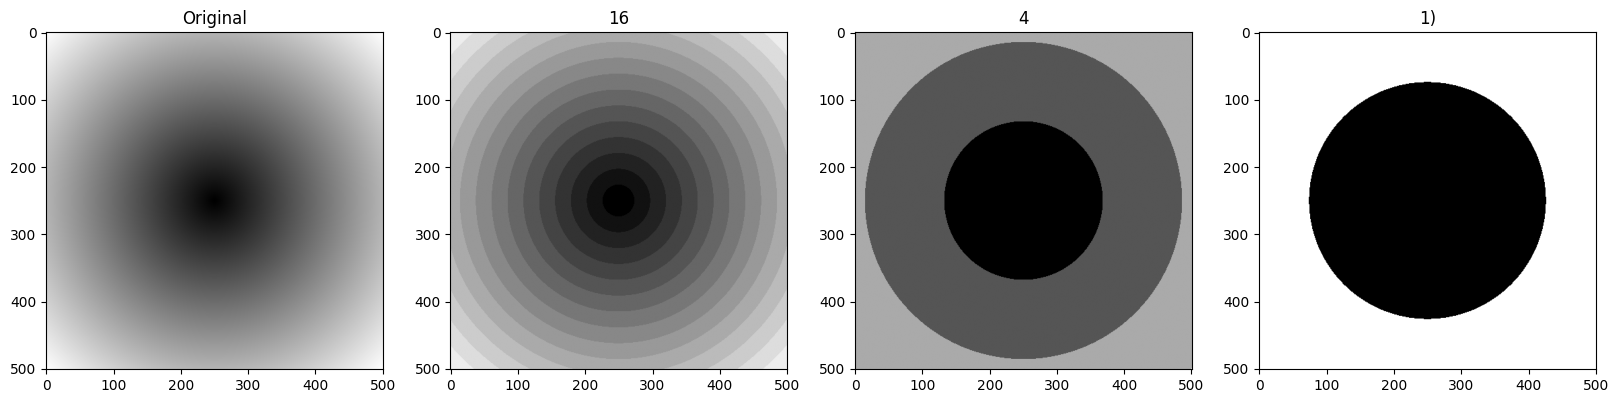

In [55]:
print(np.max(dist_map_norm))
dist16 = quantize(dist_map_norm, 16)
dist4 = quantize(dist_map_norm, 4)
dist1 = quantize(dist_map_norm, 2)


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(dist_map_norm, cmap='gray')

axes[0].set_title("Original")
axes[1].imshow(dist16, cmap='gray')

axes[1].set_title("16")
axes[2].imshow(dist4, cmap='gray')

axes[2].set_title("4")
axes[3].imshow(dist1, cmap='gray')
axes[3].set_title("1)")
plt.show()



In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


maze_path = "Maze.png" 
maze = cv2.imread(maze_path, 0)

binary_maze = np.zeros_like(maze)  


for i in range(maze.shape[0]):  
    for j in range(maze.shape[1]):  
        if maze[i, j] < 127:
            binary_maze[i, j] = 255 
        else:
            binary_maze[i, j] = 0   


labeled_maze = np.zeros_like(binary_maze, dtype=np.int32)
label = 1  
height, width = binary_maze.shape


directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]

def flood_fill(x, y, current_label):
    stack = [(x, y)]
    labeled_maze[x, y] = current_label
    while stack:
        cx, cy = stack.pop()
        
        for dx, dy in directions:
            nx, ny = cx + dx, cy + dy
            if 0 <= nx < height and 0 <= ny < width and binary_maze[nx, ny] == 255 and labeled_maze[nx, ny] == 0:
                labeled_maze[nx, ny] = current_label
                stack.append((nx, ny))


for i in range(height):
    for j in range(width):
        if binary_maze[i, j] == 255 and labeled_maze[i, j] == 0: 
            flood_fill(i, j, label)  
            label += 1 

labeled_maze_display = np.uint8(labeled_maze * 50)  
cv2.imshow("Labeled Maze", labeled_maze_display)
cv2.waitKey(0)

-1

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


maze_path = "Maze.png"  # Make sure the image path is correct
maze = cv2.imread(maze_path, cv2.IMREAD_GRAYSCALE)

# Convert the maze to binary (thresholding)
_, binary_maze = cv2.threshold(maze, 127, 255, cv2.THRESH_BINARY_INV)

# Initialize label matrix
labeled_maze = np.zeros_like(binary_maze, dtype=np.int32)
label = 1  # Start labeling from 1
height, width = binary_maze.shape

# Directions for 4-connectivity (up, left, down, right)
directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]

# Helper function to perform flood fill and label the component
def flood_fill(x, y, current_label):
    # Create a stack for flood fill (DFS approach)
    stack = [(x, y)]
    labeled_maze[x, y] = current_label
    
    while stack:
        cx, cy = stack.pop()
        
        for dx, dy in directions:
            nx, ny = cx + dx, cy + dy
            if 0 <= nx < height and 0 <= ny < width and binary_maze[nx, ny] == 255 and labeled_maze[nx, ny] == 0:
                labeled_maze[nx, ny] = current_label
                stack.append((nx, ny))

# Perform manual connected component labeling
for i in range(height):
    for j in range(width):
        if binary_maze[i, j] == 255 and labeled_maze[i, j] == 0:  # Unlabeled white pixel
            flood_fill(i, j, label)  # Label the component
            label += 1  # Move to next label

# Convert labeled maze to an 8-bit image for display
labeled_maze_display = np.uint8(labeled_maze * 50)  # Multiply by 50 to enhance visibility of labels

# Display the labeled maze using OpenCV
cv2.imshow("Labeled Maze", labeled_maze_display)
cv2.waitKey(0)
cv2.destroyAllWindows()


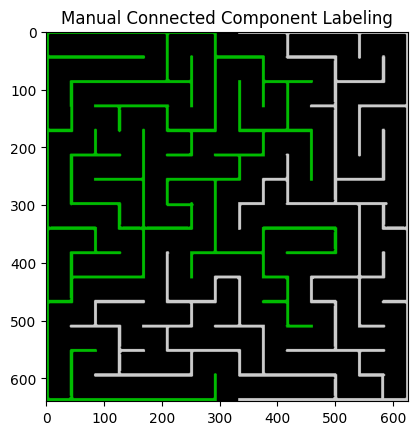

In [17]:
plt.imshow(labeled_maze, cmap='nipy_spectral')  # Use 'nipy_spectral' for a distinct color map
plt.title("Manual Connected Component Labeling")
plt.show()


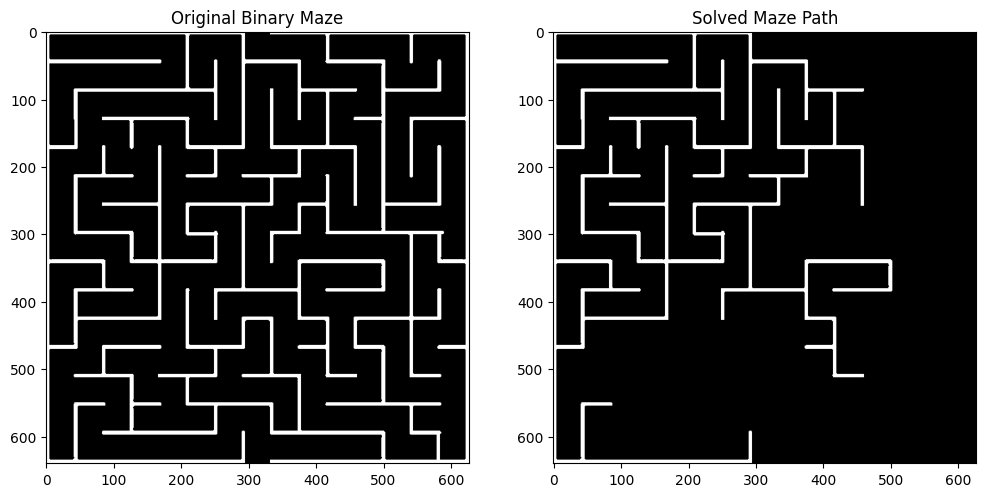

In [10]:
maze_path = "Maze.png"  # Update this if using a different path
maze = cv2.imread(maze_path, 0)
_, binary_maze = cv2.threshold(maze, 127, 255, cv2.THRESH_BINARY_INV)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_maze, connectivity=4)

# Highlight only the correct path from start to finish
output_maze = np.zeros_like(binary_maze)

# Find the largest connected component (excluding background)
largest_component = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])  # Skip background (index 0)

# Assign the correct path pixels
output_maze[labels == largest_component] = 255

# Display the original and processed maze
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(binary_maze, cmap='gray')
axes[0].set_title("Original Binary Maze")
axes[1].imshow(output_maze, cmap='gray')
axes[1].set_title("Solved Maze Path")
plt.show()


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


maze_path = "Maze.png"  

maze = cv2.imread(maze_path, cv2.IMREAD_GRAYSCALE)

_, binary_maze = cv2.threshold(maze, 127, 255, cv2.THRESH_BINARY_INV)


labeled_maze = np.zeros_like(binary_maze, dtype=np.int32)
label = 1  
height, width = binary_maze.shape

directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]


def flood_fill(x, y, current_label):
    stack = [(x, y)]
    labeled_maze[x, y] = current_label
    while stack:
        cx, cy = stack.pop()
        
        for dx, dy in directions:
            nx, ny = cx + dx, cy + dy
            if 0 <= nx < height and 0 <= ny < width and binary_maze[nx, ny] == 255 and labeled_maze[nx, ny] == 0:
                labeled_maze[nx, ny] = current_label
                stack.append((nx, ny))

# Perform manual connected component labeling
for i in range(height):
    for j in range(width):
        if binary_maze[i, j] == 255 and labeled_maze[i, j] == 0:  # Unlabeled white pixel
            flood_fill(i, j, label)  # Label the component
            label += 1  # Move to next label

# Display the labeled maze
cv2.imshow("Labeled Maze", labeled_maze * 50)  # Multiplied by 50 for better visibility of labels
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optionally, display the labeled maze using matplotlib
plt.imshow(labeled_maze, cmap='nipy_spectral')  # Use 'nipy_spectral' for a distinct color map
plt.title("Manual Connected Component Labeling")
plt.show()


error: OpenCV(4.11.0) D:/a/opencv-python/opencv-python/opencv/modules/highgui/src/precomp.hpp:157: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


maze_path = "Maze.png"  # Make sure the image path is correct
maze = cv2.imread(maze_path, cv2.IMREAD_GRAYSCALE)

# Convert the maze to binary (thresholding)
_, binary_maze = cv2.threshold(maze, 127, 255, cv2.THRESH_BINARY_INV)

# Initialize label matrix
labeled_maze = np.zeros_like(binary_maze, dtype=np.int32)
label = 1  # Start labeling from 1
height, width = binary_maze.shape

# Directions for 4-connectivity (up, left, down, right)
directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]

# Helper function to perform flood fill and label the component
def flood_fill(x, y, current_label):
    # Create a stack for flood fill (DFS approach)
    stack = [(x, y)]
    labeled_maze[x, y] = current_label
    
    while stack:
        cx, cy = stack.pop()
        
        for dx, dy in directions:
            nx, ny = cx + dx, cy + dy
            if 0 <= nx < height and 0 <= ny < width and binary_maze[nx, ny] == 255 and labeled_maze[nx, ny] == 0:
                labeled_maze[nx, ny] = current_label
                stack.append((nx, ny))

# Perform manual connected component labeling
for i in range(height):
    for j in range(width):
        if binary_maze[i, j] == 255 and labeled_maze[i, j] == 0:  # Unlabeled white pixel
            flood_fill(i, j, label)  # Label the component
            label += 1  # Move to next label

# Convert labeled maze to an 8-bit image for display
labeled_maze_display = np.uint8(labeled_maze * 50)  # Multiply by 50 to enhance visibility of labels

# Display the labeled maze using OpenCV
cv2.imshow("Labeled Maze", labeled_maze_display)
cv2.waitKey(0)
cv2.destroyAllWindows()


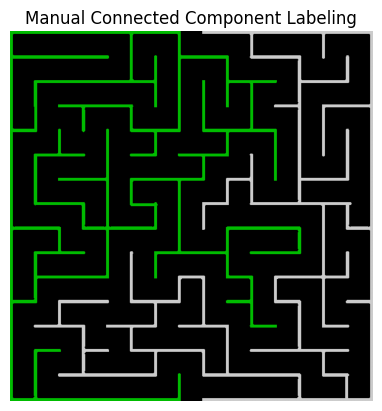

In [4]:

# Optionally, display the labeled maze using matplotlib
plt.imshow(labeled_maze, cmap='nipy_spectral')  # Use 'nipy_spectral' for a distinct color map
plt.title("Manual Connected Component Labeling")
plt.axis('off')  # Hide axis for a cleaner display
plt.show()


In [ ]:
import cv2
import numpy as np

path = "D:\\2. DIP\\2. LAB\\cc.png"
img = cv2.imread(path, 0)
img1 = img.copy()
im2 = img.copy()
im3= img.copy()
row, col = img.shape
row_s = row//16
col_s = col//16
# for 15
level = 0
for i in range(16):
        col_s = i*16
        col_end = (i+1)*16
        img1[0:row,col_s:col_end]=level
        level += 15

cv2.imshow('win', img)
cv2.waitKey() 

In [1]:
import numpy as np
import cv2
img = cv2.imread('lab1,2/gradient.png', 0)
img2=img
img3=img
rows,columns=img.shape

for i in range(rows):
    for j in range(columns):
        if 0 <= img[i, j] < 15:
            img[i, j] = 0
            
        elif 16 <= img[i, j] < 31:
            img[i, j] = 1*16
        elif 32<= img[i, j] < 47:
            
            img[i, j] = 2*16
        elif 48 <= img[i, j] < 63:
            img[i, j] = 3*16
        elif 64 <= img[i, j] <79:
            img[i, j] = 4*16
        elif 80<= img[i, j] <95:
            img[i, j] = 5*16
        elif 96 <= img[i, j] <111:
            img[i, j] = 6*16
        elif 112<= img[i, j] < 127:
            img[i, j] = 7*16
        elif 128<= img[i, j] <143:
            img[i, j] = 8*16
        elif 144 <= img[i, j] < 159:
            img[i, j] = 9*16
        elif 160 <= img[i, j] < 175:
            img[i, j] = 10*16
        elif 176<= img[i, j] < 191:
            img[i, j] = 11*16
        elif 192 <= img[i, j] < 207:
            img[i, j] = 12*16
        elif 208 <= img[i, j] < 223:
            img[i, j] = 13*16
        elif  224<= img[i, j] < 239:
            
            img[i, j] = 14*16
        elif 240 <= img[i, j] < 255:
            img[i, j] = 15*16

cv2.imshow("16 Level Image", img)
cv2.waitKey(0)



-1

In [15]:
import numpy as np
import cv2
img2 = cv2.imread('lab1,2/gradient.png', 0)


rows,columns=img.shape
shade = 64
for i in range(rows):
    for j in range(columns):
        if 0 <= im2[i, j] < 63:
            img2[:, j] = 0
        elif 64 <= im2[i, j] < 127:
            img2[:, j] = 1*shade
        elif 128<= im2[i, j] < 191:
            img2[:, j] = 2*shade
        elif 192<= im2[i, j] < 255:
            img2[:, j] = 4*shade-1
print()
cv2.imshow("Image", img2)
cv2.waitKey(0)



27

In [11]:
import numpy as np
import cv2
img3 = cv2.imread('lab1,2/gradient.png', 0)

rows,columns=img.shape

for i in range(rows):
    for j in range(columns):
        if 0 <= img3[i, j] < 127:
            img3[i, j] = 0
        else: img3[i,j]=1*255

cv2.imshow("2 level Image", img3)
cv2.waitKey(0)

27

In [6]:
import cv2
import numpy as np

path = "lab1,2/gradient.png"
im2 = cv2.imread(path, 0)

row, col = img.shape
img3= np.zeros(img.shape, np.uint8)

col_s_add = col//4

level = 0

for i in range(4):
    col_s = i*col_s_add
    col_end = (i+1)*col_s_add
    img3[:,col_s:col_end]=level
    level += 63


cv2.imshow('win', img3)
cv2.waitKey()

-1

In [8]:
import numpy as np
import cv2
img3 = cv2.imread('lab1,2/gradient.png', 0)

level = 0
for i in range(2):
        col_s = i*128
        col_end = (i+1)*128
        img3[:,col_s:col_end]=level
        level += 255

cv2.imshow("2Level Image", img3)
cv2.waitKey(0)

-1

In [28]:
import cv2
import numpy as np

path = "D:\\2. DIP\\2. LAB\\cc.png"
img = cv2.imread(path, 0)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] == 1:
            img[i][j] = 0
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(209, 262), dtype=uint8)

In [11]:
img4 = np.zeros((img.shape[0],img.shape[1]), np.uint8)
img4

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(209, 262), dtype=uint8)

In [42]:
import cv2
import numpy as np

path = "D:\\2. DIP\\2. LAB\\cc.png"
img = cv2.imread(path, 0)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] == 1:
            img[i][j] = 0
row,col = img.shape
img4 =  np.zeros((img.shape[0],img.shape[1]), np.uint8)

level= 255
diff = 0
count = 0

dict = {}
for i in range(1,row):
    for j in range(1,col):
        if img[i,j] !=0:
            if img4[i-1, j] == 0 and img4[i, j-1] == 0:
                img4[i,j] =level
                level -=10
                
                #print("cond 1")
            elif img4[i-1, j] !=0 and img4[i,j-1] != 0:
                if img4[i-1,j] == img4[i,j-1]:
                    img4[i,j] = img4[i-1,j]
                    level -=10
                    print("cond 2")  
                    count += 1
                else:
                    diff = img4[i-1,j]
                    for i in range(row):
                        for j in range(col):
                            if img4[i,j] == img4[i,j-1]:
                                img4[i,j] = diff
                                level -=10
                                
            elif img4[i, j-1] !=0:
                img4[i,j] =img4[i,j-1]
            elif img4[i-1, j-1] !=0:
                img4[i,j] =img4[i-1,j]
            if level <1:
                level = 0
        print(level)
print(count, level)           
        
cv2.imshow("Image", img4)
cv2.waitKey(0)      

255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


-1

In [39]:
import cv2
import numpy as np

path = "D:\\2. DIP\\2. LAB\\cc.png"
img = cv2.imread(path, 0)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] == 1:
            img[i][j] = 0
row,col = img.shape
img4 =  np.zeros((img.shape[0],img.shape[1]), np.uint8)
print(img4[img4==0].shape)
level= 0
diff = 0
count = 0


for i in range(1,row):
    for j in range(1,col):
        if img[i,j] !=0:
            if img4[i-1,j] and img4[i,j-1]  == 0:
                img4[i,j] =level
                level +=10
                
                print("cond 1")
            
print(count, level)           
        
cv2.imshow("Image", img4)
cv2.waitKey(0)      

(54758,)
0 0


-1

In [1]:
import cv2
import numpy as np

def connected_component_labeling(img):
    labeled_img = np.zeros(img.shape, dtype=int)
    label = 0
    rows, cols = img.shape


    label_equivalences = {}

    for i in range(rows):
        for j in range(cols):
            if img[i, j] == 255:  # White pixel (foreground)
                neighbors = []
                if i > 0 and labeled_img[i - 1, j] > 0:
                    neighbors.append(labeled_img[i - 1, j])
                if j > 0 and labeled_img[i, j - 1] > 0:
                    neighbors.append(labeled_img[i, j - 1])

                if not neighbors:
                    label += 1
                    labeled_img[i, j] = label
                else:
                    min_label = min(neighbors)
                    labeled_img[i, j] = min_label
                    for neighbor in neighbors:
                        if neighbor != min_label:
                            label_equivalences.setdefault(min_label, set()).add(neighbor)
                            label_equivalences.setdefault(neighbor, set()).add(min_label)

    def find_root(label, parent_map):
        while parent_map[label] != label:
            label = parent_map[label]
        return label

    def union_labels(label1, label2, parent_map):
        root1 = find_root(label1, parent_map)
        root2 = find_root(label2, parent_map)
        if root1 != root2:
            parent_map[root2] = root1
    parent_map = {lbl: lbl for lbl in range(1, label + 1)}
    for lbl, equivalents in label_equivalences.items():
        for eq_lbl in equivalents:
            union_labels(lbl, eq_lbl, parent_map)

    for lbl in range(1, label + 1):
        parent_map[lbl] = find_root(lbl, parent_map)

    for i in range(rows):
        for j in range(cols):
            if labeled_img[i, j] > 0:
                labeled_img[i, j] = parent_map[labeled_img[i, j]]

    unique_labels = np.unique(labeled_img)
    unique_labels = unique_labels[unique_labels > 0]  # Exclude 0 (background)

    return labeled_img, len(unique_labels)



image_path = "lab1,2/cc.png"  
binary_image = cv2.imread(image_path, 0)

labeled_image, object_count = connected_component_labeling(binary_image)

print(f"number of objects: {object_count}")


Total number of objects detected: 9


In [2]:
      
cv2.imshow("Image", labeled_image)
cv2.waitKey(0)      

error: OpenCV(4.11.0) D:/a/opencv-python/opencv-python/opencv/modules/highgui/src/precomp.hpp:157: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


In [2]:
import cv2
import numpy as np
def connected_component_labeling(binary_image):
    labeled_image = np.zeros(binary_image.shape, dtype=int)
    current_label = 0
    num_rows, num_cols = binary_image.shape
    equivalence_dict = {}

    for row in range(num_rows):
        for col in range(num_cols):
            if binary_image[row, col] == 255:
                neighbors = []
                if row > 0 and labeled_image[row - 1, col] > 0:
                    neighbors.append(labeled_image[row - 1, col])
                if col > 0 and labeled_image[row, col - 1] > 0:
                    neighbors.append(labeled_image[row, col - 1])

                if not neighbors:
                    current_label += 1
                    labeled_image[row, col] = current_label

                else:

                    min_label = min(neighbors)
                    labeled_image[row, col] = min_label
                    for neighbor_label in neighbors:
                        if neighbor_label != min_label:
                            equivalence_dict.setdefault(min_label, set()).add(neighbor_label)
                            equivalence_dict.setdefault(neighbor_label, set()).add(min_label)

    def find_root(label, label_map):
        while label_map[label] != label:
            label = label_map[label]
        return label

    def union_labels(label1, label2, label_map):
        root1 = find_root(label1, label_map)

        root2 = find_root(label2, label_map)
        if root1 != root2:
            label_map[root2] = root1


    parent_map = {lbl: lbl for lbl in range(1, current_label + 1)}


    for lbl, equivalent_labels in equivalence_dict.items():

        for eq_lbl in equivalent_labels:
            union_labels(lbl, eq_lbl, parent_map)

    for lbl in range(1, current_label + 1):
        parent_map[lbl] = find_root(lbl, parent_map)

    for row in range(num_rows):
        for col in range(num_cols):
            if labeled_image[row, col] > 0:
                labeled_image[row, col] = parent_map[labeled_image[row, col]]

    unique_labels = np.unique(labeled_image)
    unique_labels = unique_labels[unique_labels > 0]

    return labeled_image, len(unique_labels)


binary_image_path = "lab1,2/cc.png"
binary_image = cv2.imread(binary_image_path, 0)



labeled_image, object_count = connected_component_labeling(binary_image)
print(f" number of objects : {object_count}")


 number of objects : 9
